### 2a) Load the data and report general information from the data (+Histogram)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 3600 entries, 0 to 3599
dtypes: float64(3600)
memory usage: 56.4 KB
None
           0         1          2         3          4         5         6     \
count  2.000000  2.000000   2.000000  2.000000   2.000000  2.000000  2.000000   
mean   4.951814  5.473387   7.729196  5.332286   7.706135  5.471006  3.595043   
std    5.588709  6.326325   9.516520  6.126778   9.483907  6.322957  5.084159   
min    1.000000  1.000000   1.000000  1.000000   1.000000  1.000000  0.000000   
25%    2.975907  3.236694   4.364598  3.166143   4.353067  3.235503  1.797522   
50%    4.951814  5.473387   7.729196  5.332286   7.706135  5.471006  3.595043   
75%    6.927721  7.710081  11.093794  7.498429  11.059202  7.706509  5.392565   
max    8.903629  9.946774  14.458392  9.664572  14.412270  9.942011  7.190087   

           7         8          9     ...      3590      3591      3592  \
count  2.000000  2.000000   2.000000  ...  2.

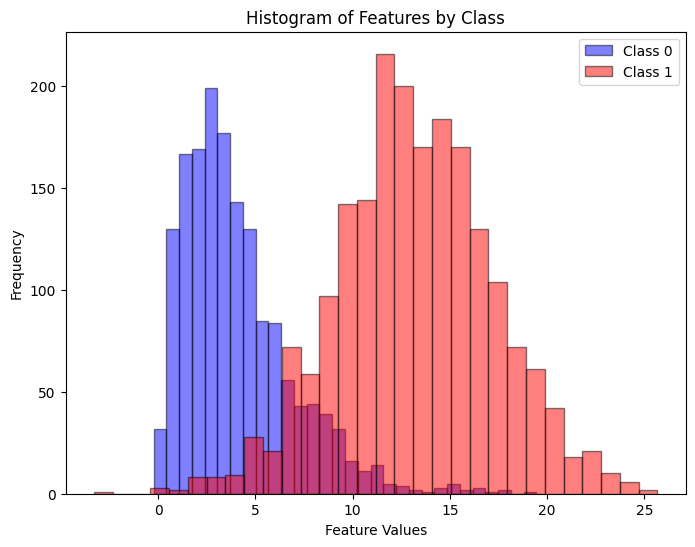

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('data_problem2.csv', header=None, delimiter=',')

print(data.info())
print(data.describe())
print(data.head())

# Splitting the data into features and labels
features = data.iloc[0, :]  
labels = data.iloc[1, :] 

class_0_features = features[labels == 0].values.flatten()  # Features for class 0
class_1_features = features[labels == 1].values.flatten()  # Features for class 1

# Plot the histogram
plt.figure(figsize=(8, 6))
# blue color for Class 0
plt.hist(class_0_features, bins=30, alpha=0.5, label='Class 0', color='blue', edgecolor='black')
# red color for Class 0
plt.hist(class_1_features, bins=30, alpha=0.5, label='Class 1', color='red', edgecolor='black')

plt.title('Histogram of Features by Class')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 2c) 
Split the data into training and test data.Use the maximum likelihood estimations to estimate the
parameters based on the training data. Use the point-estimations of the parameters to implement a Bayes’
classifier. Report the test accuracy.


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import gamma, norm

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features.T, labels.T, test_size=0.2, random_state=42)


# Splitting the training data into two classes
X_train_class_0 = X_train[y_train == 0]  # Features for class 0
X_train_class_1 = X_train[y_train == 1]  # Features for class 1

# Maximum likelihood estiamtio for Gamma distribution
# (Class 0)
alpha = 2  # Given in the task
beta_class_0 = np.mean(X_train_class_0, axis=0) / alpha

# Maximum likelihood estimation for Gaussian distribution (Class 1)
mu_class_1 = np.mean(X_train_class_1, axis=0)
sigma2_class_1 = np.var(X_train_class_1, axis=0)

# Bayes classifier implementation
def bayes_classifier(X_test, mu_class_1, sigma2_class_1, beta_class_0, alpha):
    predictions = []
    
    for x in X_test:
        # Compute Gamma likelihood for Class 0
        gamma_likelihood = np.prod(gamma.pdf(x, a=alpha, scale=beta_class_0))
        
        # Compute Gaussian likelihood for Class 1
        gaussian_likelihood = np.prod(norm.pdf(x, loc=mu_class_1, scale=np.sqrt(sigma2_class_1)))
        
        # Classify based on the higher likelihood
        if gamma_likelihood > gaussian_likelihood:
            predictions.append(0)
        else:
            predictions.append(1)
    
    return np.array(predictions)

# Predict the labels for the test set
y_train_pred = bayes_classifier(X_train, mu_class_1, sigma2_class_1, beta_class_0, alpha)
y_test_pred = bayes_classifier(X_test, mu_class_1, sigma2_class_1, beta_class_0, alpha)




# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    
    # Check to see if y_true and y_pred are numpy arrays
    y_true = y_true.values if isinstance(y_true, pd.Series) else y_true
    y_pred = y_pred.values if isinstance(y_pred, pd.Series) else y_pred
    
    # looping over all the true labels
    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1
    
    accuracy = correct / total
    return accuracy


# Calculate and report test accuracy
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



Test Accuracy: 91.25%
